 ### Microsoft Movie Proposal
The purpose of this project is to determine the Ideal movie budget, Genre,\
Release month and the effect of the reviews on the movies ROI and profitability


In this review, we will look at the data to determine how we can produce a movie\
with the highest profitability and ROI

First we must import all our packages for use in the review of the data

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import csv
import seaborn as sns
%matplotlib inline
import datetime

We are bringing in all the data for review

In [2]:
movie_budgets_tn = pd.read_csv('/Users/jasonhart/Desktop/flatiron/Phase_1/\
project_folder/tn.movie_budgets.csv', header = 1)

In [3]:
movie_budgets_bom = pd.read_csv('/Users/jasonhart/Desktop/flatiron/Phase_1/\
project_folder/bom.movie_gross.csv', header = 1)
    

In [4]:
tmb_movies = pd.read_csv('/Users/jasonhart/Desktop/flatiron/Phase_1/\
project_folder/tmdb.movies.csv', header = 1)

In [5]:
rt_reviews = pd.read_csv('/Users/jasonhart/Desktop/flatiron/Phase_1/project_folder/rt.reviews.csv', header = 1)

In [6]:
db_conn = sqlite3.connect('/Users/jasonhart/Desktop/flatiron/Phase_1/project_folder/im.db')


In [7]:
cur = db_conn.cursor()

In [8]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")


Data brought into the notebook and begining the data cleaning process

In [9]:
movie_budgets_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000.00","$760,507,625.00","$2,776,345,279.00"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000.00","$241,063,875.00","$1,045,663,875.00"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000.00","$42,762,350.00","$149,762,350.00"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000.00","$459,005,868.00","$1,403,013,963.00"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000.00","$620,181,382.00","$1,316,721,747.00"


Taking the monetary data from object type to a numerical type

In [10]:
movie_budgets_tn['production_budget'] = movie_budgets_tn['production_budget']\
.str.replace('$',"").str.replace(",",'').astype(float)


In [11]:
movie_budgets_tn['domestic_gross']=movie_budgets_tn['domestic_gross']\
.str.replace('$','').str.replace(",",'').astype(float)

In [12]:
movie_budgets_tn['worldwide_gross']=movie_budgets_tn['worldwide_gross']\
.str.replace('$','').str.replace(",",'').astype(float)

Setting index = movie title

In [13]:
movie_budgets_tn = movie_budgets_tn.set_index('movie').drop('id', axis = 1)

In [14]:
movie_budgets_tn.head()

,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,
Avatar,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,241063875.0,1.045664e+09
Dark Phoenix,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08
Avengers: Age of Ultron,"May 1, 2015",330600000.0,459005868.0,1.403014e+09
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",317000000.0,620181382.0,1.316722e+09


Utilizing the title as the index

In [15]:
movie_budgets_bom.set_index('title', inplace = True)

In [16]:
movie_budgets_bom.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


Creating a profit and ROI column to perform comparison

In [17]:
movie_budgets_tn.head()

,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,
Avatar,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,241063875.0,1.045664e+09
Dark Phoenix,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08
Avengers: Age of Ultron,"May 1, 2015",330600000.0,459005868.0,1.403014e+09
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",317000000.0,620181382.0,1.316722e+09


In [18]:
movie_budgets_tn['profit']=(movie_budgets_tn['worldwide_gross']+\
movie_budgets_tn['domestic_gross'])-movie_budgets_tn['production_budget']

In [19]:
movie_budgets_tn.sort_values('profit', ascending = False)

,release_date,production_budget,domestic_gross,worldwide_gross,profit
movie,,,,,
Avatar,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09,3.111853e+09
Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000.0,936662225.0,2.053311e+09,2.683973e+09
Titanic,"Dec 19, 1997",200000000.0,659363944.0,2.208208e+09,2.667572e+09
Avengers: Infinity War,"Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,2.426950e+09
Jurassic World,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2.086125e+09
...,...,...,...,...,...
Army of the Dead,"Dec 31, 2019",90000000.0,0.0,0.000000e+00,-9.000000e+07
Bright,"Dec 13, 2017",90000000.0,0.0,0.000000e+00,-9.000000e+07
Men in Black: International,"Jun 14, 2019",110000000.0,3100000.0,3.100000e+06,-1.038000e+08


In [20]:
movie_budgets_tn['roi']=movie_budgets_tn['profit']/movie_budgets_tn['production_budget']
movie_budgets_tn

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
Avatar,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09,3.111853e+09,7.322007
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,241063875.0,1.045664e+09,8.761278e+08,2.133774
Dark Phoenix,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08,-1.574753e+08,-0.449929
Avengers: Age of Ultron,"May 1, 2015",330600000.0,459005868.0,1.403014e+09,1.531420e+09,4.632244
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",317000000.0,620181382.0,1.316722e+09,1.619903e+09,5.110105
...,...,...,...,...,...,...
Red 11,"Dec 31, 2018",7000.0,0.0,0.000000e+00,-7.000000e+03,-1.000000
Following,"Apr 2, 1999",6000.0,48482.0,2.404950e+05,2.829770e+05,47.162833
Return to the Land of Wonders,"Jul 13, 2005",5000.0,1338.0,1.338000e+03,-2.324000e+03,-0.464800


In [21]:
movie_budgets_tn.sort_values('roi', ascending = False)

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
Deep Throat,"Jun 30, 1972",25000.0,45000000.0,45000000.0,89975000.0,3599.000000
Paranormal Activity,"Sep 25, 2009",450000.0,107918810.0,194183034.0,301651844.0,670.337431
The Blair Witch Project,"Jul 14, 1999",600000.0,140539099.0,248300000.0,388239099.0,647.065165
The Gallows,"Jul 10, 2015",100000.0,22764410.0,41656474.0,64320884.0,643.208840
El Mariachi,"Feb 26, 1993",7000.0,2040920.0,2041928.0,4075848.0,582.264000
...,...,...,...,...,...,...
The Lion of Judah,"Jun 3, 2011",1500000.0,0.0,0.0,-1500000.0,-1.000000
Fetching Cody,"Mar 17, 2006",1500000.0,0.0,0.0,-1500000.0,-1.000000
The Kingâs Thief,"Aug 5, 1955",1577000.0,0.0,0.0,-1577000.0,-1.000000


Determining how to restict the data to eliminate outlyers

In [22]:
movie_budgets_tn.describe()

,production_budget,domestic_gross,worldwide_gross,profit,roi
count,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,1.017730e+08,6.783702
std,4.181208e+07,6.824060e+07,1.747200e+08,2.108880e+08,54.922090
min,1.100000e+03,0.000000e+00,0.000000e+00,-1.574753e+08,-1.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,-3.098222e+05,-0.202878
50%,1.700000e+07,1.722594e+07,2.798445e+07,2.499538e+07,1.659315
75%,4.000000e+07,5.234866e+07,9.764584e+07,1.111648e+08,4.893170
max,4.250000e+08,9.366622e+08,2.776345e+09,3.111853e+09,3599.000000


Restricting data to interquartile range to reduce outlyers and because\
Microsoft would not have a minimal or maximum budget for first movie

In [23]:
pb_q1 = movie_budgets_tn['production_budget'].quantile(0.25)
pb_q3 = movie_budgets_tn['production_budget'].quantile(0.75)
pb_q3


40000000.0

In [24]:
movie_budgets_filtered_iqr = movie_budgets_tn.query('@pb_q1 <= production_budget <= @pb_q3')

In [25]:
movie_budgets_filtered_iqr.sort_values('production_budget')

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
Running Forever,"Oct 27, 2015",5000000.0,0.0,0.0,-5000000.0,-1.000000
Nighthawks,"Apr 10, 1981",5000000.0,14600000.0,19600000.0,29200000.0,5.840000
Eve's Bayou,"Nov 7, 1997",5000000.0,14843425.0,14843425.0,24686850.0,4.937370
The Egyptian,"Aug 24, 1954",5000000.0,15000000.0,15000000.0,25000000.0,5.000000
Halloween: The Curse of Michael Myers,"Sep 29, 1995",5000000.0,15126948.0,15126948.0,25253896.0,5.050779
...,...,...,...,...,...,...
The Other Boleyn Girl,"Feb 29, 2008",40000000.0,26814957.0,78269970.0,65084927.0,1.627123
Resident Evil: The Final Chapter,"Jan 27, 2017",40000000.0,26844692.0,314101190.0,300945882.0,7.523647
The Musketeer,"Sep 7, 2001",40000000.0,27053815.0,27053815.0,14107630.0,0.352691


In [26]:
movie_budgets_filtered_iqr.describe()

,production_budget,domestic_gross,worldwide_gross,profit,roi
count,3.026000e+03,3.026000e+03,3.026000e+03,3.026000e+03,3026.000000
mean,1.890342e+07,3.026370e+07,5.396695e+07,6.532723e+07,4.020904
std,1.039523e+07,4.049290e+07,7.682826e+07,1.123250e+08,8.110522
min,5.000000e+06,0.000000e+00,0.000000e+00,-4.000000e+07,-1.000000
25%,1.000000e+07,4.019142e+06,8.845900e+06,-1.242596e+06,-0.085363
50%,1.700000e+07,1.725211e+07,2.810052e+07,2.836259e+07,1.736448
75%,2.600000e+07,4.082051e+07,6.782200e+07,8.762205e+07,4.984722
max,4.000000e+07,4.609980e+08,7.929653e+08,1.236596e+09,122.265648


In [27]:
movie_budgets_filtered_iqr_pivot = movie_budgets_filtered_iqr.pivot_table(columns =['roi', 'profit'], values= 'production_budget', aggfunc= 'mean')
movie_budgets_filtered_iqr_pivot.head()

roi                 -1.000000                                              \
profit            -4.000000e+07 -3.500000e+07 -3.200000e+07 -3.000000e+07   
production_budget    40000000.0    35000000.0    32000000.0    30000000.0   

roi                                                                        \
profit            -2.900000e+07 -2.700000e+07 -2.600000e+07 -2.500000e+07   
production_budget    29000000.0    27000000.0    26000000.0    25000000.0   

roi                                            ...    56.638059   \
profit            -2.100000e+07 -2.000000e+07  ...  3.964664e+08   
production_budget    21000000.0    20000000.0  ...     7000000.0   

roi                  57.042301     59.891667     61.213730     82.421278   \
profit             3.137327e+08  7.187000e+08  3.060687e+08  4.121064e+08   
production_budget     5500000.0    12000000.0     5000000.0     5000000.0   

roi                  85.281723     93.887325     112.417819    115.959608  \
profit             4.264086e+08  5.633239e+08  1.236596e+09  1.217576e+09   
production_budget     5000000.0     6000000.0    11000000.0    10500000.0   

roi                  122.265648  
profit             6.113282e+08  
production_budget     5000000.0  

[1 rows x 2978 columns]

In [28]:
#sns.histplot( movie_budgets_filtered_iqr_pivot, x = 'roi', y = 'production_budget' )

In [29]:
movie_budgets_filtered_iqr.plot.kde
plt.show()

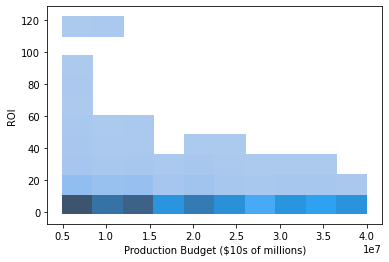

In [30]:
profits_vis2 = sns.histplot(data = movie_budgets_filtered_iqr, y="roi", x='production_budget', bins = 10 )
plt.xlabel("Production Budget ($10s of millions)")
plt.ylabel('ROI')
plt.show()

In [31]:
#sns.barplot(data = movie_budgets_filtered_iqr, x = 'profit', y = 'production_budget')


In [32]:
#sns.histplot(data =movie_budgets_filtered_iqr,y='roi',x = 'production_budget', bins = 20)

In [33]:
movie_budgets_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [34]:
movie_budgets_bom['foreign_gross'] = movie_budgets_bom['foreign_gross'].str.replace(',','').astype(float)
movie_budgets_bom

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
Inception,WB,292600000.0,535700000.0,2010
Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [35]:
movie_budgets_bom.replace(np.nan, 0, inplace = True)

In [36]:
movie_budgets_bom.sort_values('year')


,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010
Flipped,WB,1800000.0,0.0,2010
Cairo Time,IFC,1600000.0,391000.0,2010
After.Life,Anch.,109000.0,1900000.0,2010
Golmaal 3,Eros,1100000.0,935000.0,2010
...,...,...,...,...
Mary Queen of Scots,Focus,16500000.0,29900000.0,2018
Tyler Perry's Acrimony,LGF,43500000.0,2900000.0,2018
Uncle Drew,LG/S,42500000.0,4200000.0,2018


In [37]:
movie_budgets_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3387 non-null   object 
 1   domestic_gross  3387 non-null   float64
 2   foreign_gross   3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 132.3+ KB


In [38]:
movie_budgets_bom['total_gross']=movie_budgets_bom['domestic_gross']+movie_budgets_bom['foreign_gross']

In [39]:
movie_budgets_bom.sort_values('title')

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
'71,RAtt.,1300000.0,355000.0,2015,1.655000e+06
"1,000 Times Good Night",FM,53900.0,0.0,2014,5.390000e+04
10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016,1.102000e+08
10 Years,Anch.,203000.0,0.0,2012,2.030000e+05
1001 Grams,KL,11000.0,0.0,2015,1.100000e+04
...,...,...,...,...,...
Zoolander 2,Par.,28800000.0,27900000.0,2016,5.670000e+07
Zootopia,BV,341300000.0,682500000.0,2016,1.023800e+09
[Rec] 2,Magn.,27800.0,18500000.0,2010,1.852780e+07


In [40]:
movie_budgets_tn.head()

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
Avatar,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09,3.111853e+09,7.322007
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,241063875.0,1.045664e+09,8.761278e+08,2.133774
Dark Phoenix,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08,-1.574753e+08,-0.449929
Avengers: Age of Ultron,"May 1, 2015",330600000.0,459005868.0,1.403014e+09,1.531420e+09,4.632244
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",317000000.0,620181382.0,1.316722e+09,1.619903e+09,5.110105


In [41]:
movie_budgets_tn.sort_values('movie')

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
#Horror,"Nov 20, 2015",1500000.0,0.0,0.0,-1500000.0,-1.000000
(500) Days of Summer,"Jul 17, 2009",7500000.0,32425665.0,34439060.0,59364725.0,7.915297
10 Cloverfield Lane,"Mar 11, 2016",5000000.0,72082999.0,108286422.0,175369421.0,35.073884
10 Days in a Madhouse,"Nov 11, 2015",12000000.0,14616.0,14616.0,-11970768.0,-0.997564
10 Things I Hate About You,"Mar 31, 1999",13000000.0,38177966.0,60413950.0,85591916.0,6.583994
...,...,...,...,...,...,...
mother!,"Sep 15, 2017",30000000.0,17800004.0,42531076.0,30331080.0,1.011036
xXx,"Aug 9, 2002",70000000.0,141930000.0,267200000.0,339130000.0,4.844714
xXx: Return of Xander Cage,"Jan 20, 2017",85000000.0,44898413.0,345033359.0,304931772.0,3.587433


In [42]:
tmb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [43]:
tmb_movies.sort_values('vote_average', ascending=False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,13258,[99],403294,en,9/11: Simulations,0.600,2014-07-04,9/11: Simulations,10.0,1
22787,22787,"[27, 35]",444170,en,Lasagna Cat - Telephone Sex Survey Results,0.722,2017-02-23,Lasagna Cat - Telephone Sex Survey Results,10.0,1
22592,22592,[99],488357,en,MOTO 9: The Movie,0.900,2017-11-21,MOTO 9: The Movie,10.0,1
22607,22607,[],437448,en,The Letter Carrier,0.895,2017-01-27,The Letter Carrier,10.0,1
22610,22610,"[9648, 37, 18, 10402]",463601,en,Hope This Goes Over Well/Living in an Empty World,0.894,2017-06-26,Hope This Goes Over Well/Living in an Empty World,10.0,1
...,...,...,...,...,...,...,...,...,...,...
11018,11018,[],124727,en,Darkchylde,0.600,2013-08-09,Darkchylde,0.0,1
14168,14168,[],167531,en,Summer Snow,0.600,2014-07-25,Summer Snow,0.0,1
14167,14167,"[99, 10402]",221918,en,Butch Walker: Out of Focus,0.600,2014-08-05,Butch Walker: Out of Focus,0.0,1
20601,20601,"[18, 35]",448105,en,The Angry Man,0.600,2017-04-08,The Angry Man,0.0,1


In [44]:
! ls

README.md                   rt.movie_info.numbers
bom.movie_gross (1).numbers rt.reviews.numbers
im.db                       tmdb.movies (1).numbers
phase_1 project.ipynb       tn.movie_budgets.numbers


In [45]:
tmb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [46]:
tmb_movies.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [47]:
movie_budgets_filtered_iqr

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
The Sixth Sense,"Aug 6, 1999",40000000.0,293506292.0,672806292.0,926312584.0,23.157815
Wedding Crashers,"Jul 15, 2005",40000000.0,209218368.0,283218368.0,452436736.0,11.310918
The Karate Kid,"Jun 11, 2010",40000000.0,176591618.0,351774938.0,488366556.0,12.209164
Fifty Shades of Grey,"Feb 13, 2015",40000000.0,166167230.0,570998101.0,697165331.0,17.429133
The Proposal,"Jun 19, 2009",40000000.0,163958031.0,314709717.0,438667748.0,10.966694
...,...,...,...,...,...,...
Should've Been Romeo,"Dec 31, 2012",5000000.0,0.0,0.0,-5000000.0,-1.000000
Aztec Warrior,"Dec 31, 2015",5000000.0,0.0,0.0,-5000000.0,-1.000000
Navy SEAL vs. Zombies,"Sep 25, 2015",5000000.0,0.0,0.0,-5000000.0,-1.000000


In [48]:
movie_budgets_filtered_iqr

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
The Sixth Sense,"Aug 6, 1999",40000000.0,293506292.0,672806292.0,926312584.0,23.157815
Wedding Crashers,"Jul 15, 2005",40000000.0,209218368.0,283218368.0,452436736.0,11.310918
The Karate Kid,"Jun 11, 2010",40000000.0,176591618.0,351774938.0,488366556.0,12.209164
Fifty Shades of Grey,"Feb 13, 2015",40000000.0,166167230.0,570998101.0,697165331.0,17.429133
The Proposal,"Jun 19, 2009",40000000.0,163958031.0,314709717.0,438667748.0,10.966694
...,...,...,...,...,...,...
Should've Been Romeo,"Dec 31, 2012",5000000.0,0.0,0.0,-5000000.0,-1.000000
Aztec Warrior,"Dec 31, 2015",5000000.0,0.0,0.0,-5000000.0,-1.000000
Navy SEAL vs. Zombies,"Sep 25, 2015",5000000.0,0.0,0.0,-5000000.0,-1.000000


In [49]:
movie_budgets_tn.head()

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
Avatar,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09,3.111853e+09,7.322007
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,241063875.0,1.045664e+09,8.761278e+08,2.133774
Dark Phoenix,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08,-1.574753e+08,-0.449929
Avengers: Age of Ultron,"May 1, 2015",330600000.0,459005868.0,1.403014e+09,1.531420e+09,4.632244
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",317000000.0,620181382.0,1.316722e+09,1.619903e+09,5.110105


In [50]:
tmb_movies.set_index('title', inplace= True)
tmb_movies.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
title,,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
How to Train Your Dragon,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
Iron Man 2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
Toy Story,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,7.9,10174
Inception,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186


In [51]:
movie_budgets_w_review = movie_budgets_filtered_iqr.merge(tmb_movies, left_index= True, right_index= True)


In [52]:
movie_budgets_w_review.head()

,release_date_x,production_budget,domestic_gross,worldwide_gross,profit,roi,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
10 Cloverfield Lane,"Mar 11, 2016",5000000.0,72082999.0,108286422.0,175369421.0,35.073884,17422,"[53, 878, 18]",333371,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629
10 Days in a Madhouse,"Nov 11, 2015",12000000.0,14616.0,14616.0,-11970768.0,-0.997564,15907,[18],345003,en,10 Days in a Madhouse,0.955,2015-11-20,5.4,7
12 Strong,"Jan 19, 2018",35000000.0,45819713.0,71118378.0,81938091.0,2.341088,24032,"[10752, 18, 36, 28]",429351,en,12 Strong,13.183,2018-01-19,5.6,1312
12 Years a Slave,"Oct 18, 2013",20000000.0,56671993.0,181025343.0,217697336.0,10.884867,7911,"[18, 36]",76203,en,12 Years a Slave,16.493,2013-10-30,7.9,6631
127 Hours,"Nov 5, 2010",18000000.0,18335230.0,60217171.0,60552401.0,3.364022,93,"[12, 18, 53]",44115,en,127 Hours,11.435,2010-11-05,7.0,4469


In [53]:
movie_budgets_w_review = movie_budgets_w_review[['profit', 'roi', 'production_budget', 'vote_average']]
movie_budgets_w_review.head()

,profit,roi,production_budget,vote_average
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4
12 Strong,81938091.0,2.341088,35000000.0,5.6
12 Years a Slave,217697336.0,10.884867,20000000.0,7.9
127 Hours,60552401.0,3.364022,18000000.0,7.0


In [54]:
movie_budgets_w_review.head()


,profit,roi,production_budget,vote_average
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4
12 Strong,81938091.0,2.341088,35000000.0,5.6
12 Years a Slave,217697336.0,10.884867,20000000.0,7.9
127 Hours,60552401.0,3.364022,18000000.0,7.0


In [55]:
avg_rating = pd.read_sql("""SELECT * FROM movie_ratings;""", db_conn)

In [56]:
avg_rating

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [57]:
avg_rating_genre=pd.read_sql("""
SELECT r.averagerating, primary_title, genres
FROM movie_ratings r
JOIN movie_basics b
    ON r.movie_id = b.movie_id;""", db_conn)

In [58]:
avg_rating_genre.set_index('primary_title', inplace= True)

In [59]:
avg_rating_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, Laiye Je Yaarian to Sathru
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   genres         73052 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [60]:
movie_budgets_w_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 10 Cloverfield Lane to mother!
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   profit             1189 non-null   float64
 1   roi                1189 non-null   float64
 2   production_budget  1189 non-null   float64
 3   vote_average       1189 non-null   float64
dtypes: float64(4)
memory usage: 46.4+ KB


In [61]:
movie_budgets_w_review['production_budget'].round(decimals = -7)


10 Cloverfield Lane             0.0
10 Days in a Madhouse    10000000.0
12 Strong                40000000.0
12 Years a Slave         20000000.0
127 Hours                20000000.0
                            ...    
Youth                    10000000.0
Youth                    10000000.0
Zambezia                 20000000.0
Zoom                     40000000.0
mother!                  30000000.0
Name: production_budget, Length: 1189, dtype: float64

In [62]:
movie_budgets_w_review['budget_group'] = movie_budgets_w_review['production_budget'].map(lambda x : x/5000000)
    

In [63]:
movie_budgets_w_review['budget_group'] = movie_budgets_w_review['budget_group'].round(0)

In [64]:
movie_budgets_w_review.reset_index(inplace = True)

In [65]:
movie_budgets_w_review.rename(columns= {'index': 'movie'}, inplace = True)

In [66]:
movie_budgets_w_review.head()

,movie,profit,roi,production_budget,vote_average,budget_group
0,10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,1.0
1,10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,2.0
2,12 Strong,81938091.0,2.341088,35000000.0,5.6,7.0
3,12 Years a Slave,217697336.0,10.884867,20000000.0,7.9,4.0
4,127 Hours,60552401.0,3.364022,18000000.0,7.0,4.0


In [67]:
budget_group = movie_budgets_w_review.groupby(['budget_group']).agg('mean')

In [68]:
movie_budgets_pivot= movie_budgets_w_review.pivot_table(index = 'budget_group', values = ('profit', 'roi'), aggfunc= 'mean')

In [69]:
movie_budgets_pivot.sort_values('profit')

,profit,roi
budget_group,,
2.0,4.648407e+07,4.548705
1.0,4.703846e+07,8.841384
5.0,5.779423e+07,2.330625
3.0,5.908965e+07,4.044592
4.0,8.155366e+07,4.097472
6.0,9.543494e+07,3.209804
7.0,1.025647e+08,2.912725
8.0,1.270217e+08,3.205784


<AxesSubplot:xlabel='budget_group'>

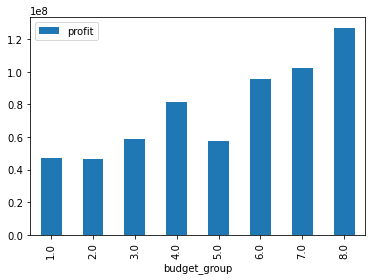

In [70]:
movie_budgets_pivot.plot.bar( y = 'profit')


<AxesSubplot:xlabel='budget_group'>

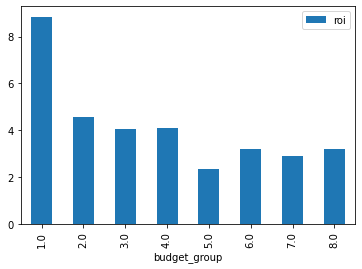

In [71]:
movie_budgets_pivot.plot.bar(y = 'roi')

In [72]:
movie_budgets_pivot

,profit,roi
budget_group,,
1.0,4.703846e+07,8.841384
2.0,4.648407e+07,4.548705
3.0,5.908965e+07,4.044592
4.0,8.155366e+07,4.097472
5.0,5.779423e+07,2.330625
6.0,9.543494e+07,3.209804
7.0,1.025647e+08,2.912725
8.0,1.270217e+08,3.205784


<AxesSubplot:xlabel='budget_group', ylabel='profit'>

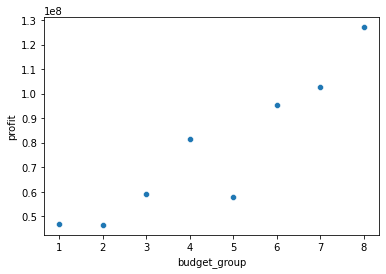

In [73]:
sns.scatterplot(data = movie_budgets_pivot, y = 'profit', x = 'budget_group')

In [74]:
avg_rating_genre

,averagerating,genres
primary_title,,
Laiye Je Yaarian,8.3,Romance
Borderless,8.9,Documentary
Just Inès,6.4,Drama
The Legend of Hercules,4.2,"Action,Adventure,Fantasy"
Até Onde?,6.5,"Mystery,Thriller"
...,...,...
Caisa,8.1,Documentary
Code Geass: Lelouch of the Rebellion - Glorification,7.5,"Action,Animation,Sci-Fi"
Sisters,4.7,"Action,Drama"


In [75]:
movie_budgets_w_review = movie_budgets_w_review.set_index('movie')

In [76]:
movie_rating_review = movie_budgets_w_review.merge(avg_rating_genre, right_index= True, left_index= True)
movie_rating_review.head()

,profit,roi,production_budget,vote_average,budget_group,averagerating,genres
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,1.0,7.2,"Drama,Horror,Mystery"
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,2.0,6.7,Drama
12 Strong,81938091.0,2.341088,35000000.0,5.6,7.0,6.6,"Action,Drama,History"
12 Years a Slave,217697336.0,10.884867,20000000.0,7.9,4.0,8.1,"Biography,Drama,History"
127 Hours,60552401.0,3.364022,18000000.0,7.0,4.0,7.6,"Adventure,Biography,Drama"


In [77]:
movie_rating_review['genres'] = movie_rating_review['genres'].str.split(",")


In [78]:
movie_rating_review.head()

,profit,roi,production_budget,vote_average,budget_group,averagerating,genres
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,1.0,7.2,"[Drama, Horror, Mystery]"
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,2.0,6.7,[Drama]
12 Strong,81938091.0,2.341088,35000000.0,5.6,7.0,6.6,"[Action, Drama, History]"
12 Years a Slave,217697336.0,10.884867,20000000.0,7.9,4.0,8.1,"[Biography, Drama, History]"
127 Hours,60552401.0,3.364022,18000000.0,7.0,4.0,7.6,"[Adventure, Biography, Drama]"


In [79]:
movie_rating_review_exploded = movie_rating_review.explode("genres")
movie_rating_review_exploded.head()

,profit,roi,production_budget,vote_average,budget_group,averagerating,genres
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,1.0,7.2,Drama
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,1.0,7.2,Horror
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,1.0,7.2,Mystery
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,2.0,6.7,Drama
12 Strong,81938091.0,2.341088,35000000.0,5.6,7.0,6.6,Action


In [80]:
genre_pivot = pd.pivot_table(movie_rating_review_exploded, index = 'genres', values = ['profit', 'roi'], aggfunc= 'mean')
genre_pivot.head()


,profit,roi
genres,,
Action,6.069633e+07,4.240434
Adventure,5.102604e+07,2.615027
Animation,4.354921e+07,4.223576
Biography,5.388147e+07,3.187390
Comedy,7.026779e+07,4.503218


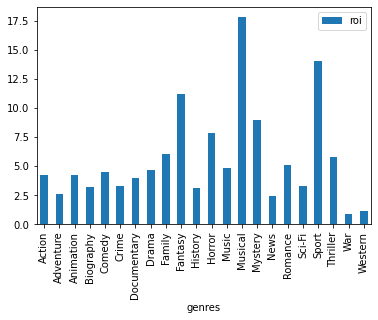

In [81]:
genre_pivot.plot.bar( y = 'roi')
plt.show()

<AxesSubplot:xlabel='genres'>

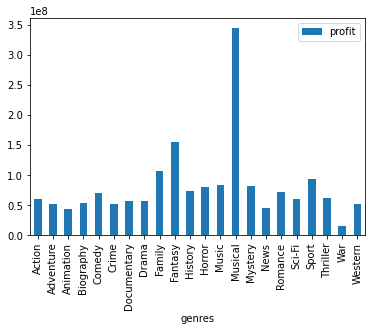

In [82]:
genre_pivot.plot.bar(y = 'profit')

In [83]:
movie_budgets_filtered_iqr['release_date']=pd.to_datetime(movie_budgets_filtered_iqr['release_date'])

<ipython-input-83-38653ed5efc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budgets_filtered_iqr['release_date']=pd.to_datetime(movie_budgets_filtered_iqr['release_date'])


In [84]:
movie_budgets_filtered_iqr['release_month'] = movie_budgets_filtered_iqr['release_date'].dt.month

<ipython-input-84-a392c75a5ea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budgets_filtered_iqr['release_month'] = movie_budgets_filtered_iqr['release_date'].dt.month


In [85]:
movie_budgets_filtered_iqr.head()

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi,release_month
movie,,,,,,,
The Sixth Sense,1999-08-06,40000000.0,293506292.0,672806292.0,926312584.0,23.157815,8
Wedding Crashers,2005-07-15,40000000.0,209218368.0,283218368.0,452436736.0,11.310918,7
The Karate Kid,2010-06-11,40000000.0,176591618.0,351774938.0,488366556.0,12.209164,6
Fifty Shades of Grey,2015-02-13,40000000.0,166167230.0,570998101.0,697165331.0,17.429133,2
The Proposal,2009-06-19,40000000.0,163958031.0,314709717.0,438667748.0,10.966694,6


In [86]:
movie_budget_months = movie_budgets_filtered_iqr.pivot_table(index = 'release_month', values = ['roi', 'profit'], aggfunc= 'mean')

In [87]:
movie_budget_months.head()

,profit,roi
release_month,,
1,5.937951e+07,3.823570
2,6.435417e+07,3.882778
3,4.914402e+07,3.524876
4,4.629670e+07,3.021822
5,7.346336e+07,4.430771


<AxesSubplot:xlabel='release_month'>

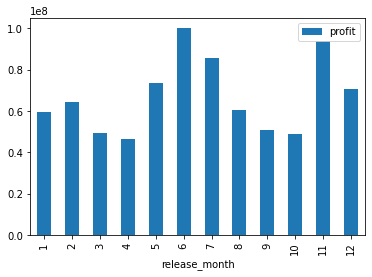

In [88]:
movie_budget_months.plot.bar( y = 'profit')

<AxesSubplot:xlabel='release_month'>

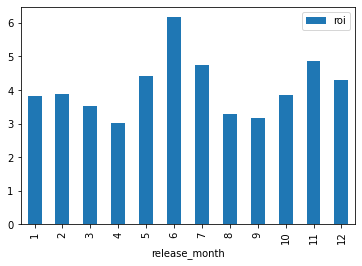

In [89]:
movie_budget_months.plot.bar(y = 'roi')